In [3]:
# imports
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import xgboost as xgb
import catboost as cb
import category_encoders as ce

from sklearn.preprocessing import KBinsDiscretizer, MinMaxScaler, SplineTransformer, LabelEncoder
from sklearn.decomposition import PCA, KernelPCA

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import (
    cross_validate, GridSearchCV
)

from sklearn.ensemble import RandomForestRegressor

from malbecs.modeling import train as tr
from malbecs.modeling.transformers import QuantileFeatureEncoder, ThresholdFeatureEncoder

seed = 42

final_wine_path = "../../data/final/wine_final.csv"
final_eto_path = "../../data/final/eto_final.csv"
final_meteo_path = "../../data/final/meteo_final.csv"


with open("../../data/final/meteo_features.txt", "r") as f:
    meteo_cols = f.read().split("\n")

with open("../../data/final/eto_features.txt", "r") as f:
    eto_cols = f.read().split("\n")

with open("../../data/final/wine_features.txt", "r", encoding='utf-8') as f:
    wine_cols = f.read().split("\n")


def show_feat_imps(feat_imp, feat_names):
    pd.DataFrame(
        feat_imp,
        index=feat_names,
        columns=["feat_imp"]
    ).sort_values("feat_imp")[-50:].plot(kind='barh', figsize=(6, 15))




In [4]:
#load all data
data = tr.load_final_data(
    wine_path=final_wine_path,
    eto_path=final_eto_path,
    meteo_path=final_meteo_path
)

In [5]:
percip_cols = [c for c in eto_cols if "Precip" in c]
snow_cols = [c for c in eto_cols if "Snow" in c]
temp_day_cols = [c for c in eto_cols if "TemperatureLocalDay" in c]
temp_cols = [c for c in eto_cols if "TemperatureLocalAfter" in c or "TemperatureLocalOvern" in c]
evotrans_cols = [c for c in eto_cols if "Evapotranspiration" in c]
feelslike_cols = [c for c in eto_cols if "FeelsLikeLoca" in c]
irrad_cols = [c for c in eto_cols if "Irradiance" in c]
gust_cols = [c for c in eto_cols if "Gust" in c]
wind_cols = [c for c in eto_cols if "Wind" in c]
dewpoint_cols = [c for c in eto_cols if "Dewpoint" in c]
mslp_cols = [c for c in eto_cols if "MSLP" in c]
humid_cols = [c for c in eto_cols if "Humidity" in c]
uvindex_cols = [c for c in eto_cols if "UVIndex" in c]
visib_cols = [c for c in eto_cols if "Visibility" in c]

In [87]:
# data prep
from sklearn.model_selection import train_test_split

data_train = tr.filter_camp(data.copy(), min_camp=15, max_camp=21)

data_final = tr.filter_camp(data, min_camp=22, max_camp=22)

train, test = tr.train_test_split(data_train, test_camp=21)

X, y = tr.xy_split(data_train)

cat_cols = [
    'id_finca', 
    'id_zona',
    'id_estacion', 
    'variedad',
    "modo", 
    "tipo",
    "color", 
    "prod_shift1_gt_shift2"
]

num_cols = [col for col in X.columns if col not in cat_cols]

X[cat_cols] = X[cat_cols].astype('category')

X_train, y_train = tr.xy_split(train)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)
X_test, y_test = tr.xy_split(test)
X_final, y_final = tr.xy_split(data_final)


train_idxs, test_idxs = tr.CampKFold.get_train_test(
    X['campaña'], from_camp=19, to_camp=21
)

cv = tr.CampKFold(train_idxs, test_idxs)


In [158]:
# snow_cols
# [c for c in snow_cols if 'Sum' in c and ("1" in c or "2" in c)]

# temp_cols
# wind_cols

In [89]:
# wine_num_cols

# X[wind_cols].hist(figsize=(15,15))
# X[[c for c in humid_cols if "Avg" in c]].hist(figsize=(15,15))
# from sklearn.decomposition import PCA, KernelPCA
# pca = make_pipeline(StandardScaler(),PCA())

# Xt = pca.fit_transform(X[wind_cols])
# wind_cols
# mslp_cols
# plot = plt.scatter(Xt[:,0], Xt[:,1])

# plt.show()

# plt.plot(
#     range(1,pca.explained_variance_ratio_.shape[0]+1),
#     np.cumsum(pca.explained_variance_ratio_),
# )

In [144]:
# random forest

def build_model():
#     model_num_cols = [
#         'superficie',
#         'prod_shift_max',
#         'prod_shift_change',
#         'prod_shift_avg',
#         'prod_est_mean_change',
#     ]

    model_num_cols = [
#         "campaña",
        'superficie',
#         'sup_tot_camp_finca',
#         'superficie_total',
#         'n_var_camp_finca',
#         'prod_shift1',
#         'prod_shift2',
#         'sup_shift1',
#         'sup_shift2',
        
        'prod_shift_max', #
        'prod_shift_change', #
        'prod_shift_avg',    #   
#         'prod_est_mean_change', #
#         'prod_he_shift1', 
#         'prod_he_shift2',
#         'prod_he_shift_change',
#         'prod_he_shift_avg',
#         'prod_he_var_zone_mean_hist',
#         'prod_he_var_zone_std_hist',
#         'prod_he_var_mean_hist',
#         'prod_he_var_std_hist',
        
#         'prod_var_shift_1', #
#         'prod_var_shift_2', #
#         'prod_he_zone_mean',
#         'prod_he_zone_std',
#         'prod_he_var_mean',
#         'prod_he_var_std',
#         'prod_finca_shift_1', #
#         'prod_finca_shift_2' #
    ]

    model_cat_cols = [
        'id_finca',
        'id_zona',
        "id_estacion",
        'variedad',
        "modo",
#         "color",
#         "prod_shift1_gt_shift2"
    ]
    m = make_pipeline( 
        make_column_transformer(
             
#             (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['id_finca']),
            (ce.CatBoostEncoder(),['id_finca']),
#             (ce.BaseNEncoder(),['id_finca']),
#             (ce.TargetEncoder(),['id_finca']),
#             (QuantileFeatureEncoder(col="id_finca"), ['id_finca']),

#             (ce.CatBoostEncoder(),['id_zona']),
            (ce.TargetEncoder(),['id_zona']),
#             (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['id_zona']),
            
#             (ce.CatBoostEncoder(),['id_estacion']),
            (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['id_estacion']),
            
            (ce.CatBoostEncoder(),['variedad']),
#             (ce.BaseNEncoder(),['id_finca']),
#             (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['variedad']),
            
            
#             (ce.CatBoostEncoder(),['modo']),
             (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['modo']),
            
            
#             (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['color']),
#             (ce.CatBoostEncoder(),['color']),
            
            
#             (QuantileFeatureEncoder(col="id_zona"), ['id_zona']),
#             (ThresholdFeatureEncoder(col='altitud'), ['altitud']),
#             (ThresholdFeatureEncoder(col='variedad'), ['variedad']),
            
#             (KBinsDiscretizer(n_bins=2), ['altitud']),
            
            (StandardScaler(), model_num_cols),
            
#             (StandardScaler(),temp_cols),
            (make_pipeline(StandardScaler(),PCA(n_components=3, random_state=seed)), temp_cols),
        
#             (StandardScaler(),[c for c in percip_cols if 'Sum' in c]),
            (make_pipeline(StandardScaler(),PCA(n_components=3, random_state=seed)),
                 [c for c in percip_cols if 'Sum' in c]
            ),
            
            (StandardScaler(),[c for c in snow_cols if 'Sum' in c and ("1" in c or "2" in c)]),
            
#             (StandardScaler(), [c for c in gust_cols if 'Max' in c ]),
#             (make_pipeline(StandardScaler(),PCA(n_components=2, random_state=seed)), [c for c in gust_cols if 'Max' in c ]),

#             (StandardScaler(),[c for c in humid_cols if "Avg" in c]),
#             (make_pipeline(StandardScaler(),PCA(n_components=3, random_state=seed)), [c for c in humid_cols if "Avg" in c]),
            
#             (make_pipeline(StandardScaler(),PCA(n_components=3, random_state=seed)), uvindex_cols),
            
#             (make_pipeline(StandardScaler(),PCA(n_components=3, random_state=seed)), dewpoint_cols),
            
#             (make_pipeline(StandardScaler(),PCA(n_components=3, random_state=seed)), wind_cols),
            
            remainder='drop'
        ),
        RandomForestRegressor(
            random_state=seed,
            n_estimators=200,
            min_samples_leaf=4,
            n_jobs=-1,
            max_features='sqrt',
#             max_features=0.7,
#             bootstrap=True,
#             oob_score=True,
            max_samples=0.9

        )
    )
    return m


In [137]:
# random forest

def build_model_no_weather():
#     model_num_cols = [
#         'superficie',
#         'prod_shift_max',
#         'prod_shift_change',
#         'prod_shift_avg',
#         'prod_est_mean_change',
#     ]

    model_num_cols = [
#         "campaña",
        'superficie',
#         'sup_tot_camp_finca',
#         'superficie_total',
#         'n_var_camp_finca',
#         'prod_shift1',
#         'prod_shift2',
#         'sup_shift1',
#         'sup_shift2',
        
        'prod_shift_max', #
        'prod_shift_change', #
        'prod_shift_avg',    #   
#         'prod_est_mean_change', #
#         'prod_he_shift1', 
#         'prod_he_shift2',
#         'prod_he_shift_change',
#         'prod_he_shift_avg',
#         'prod_he_var_zone_mean_hist',
#         'prod_he_var_zone_std_hist',
#         'prod_he_var_mean_hist',
#         'prod_he_var_std_hist',
        
#         'prod_var_shift_1', #
#         'prod_var_shift_2', #
#         'prod_he_zone_mean',
#         'prod_he_zone_std',
#         'prod_he_var_mean',
#         'prod_he_var_std',
#         'prod_finca_shift_1', #
#         'prod_finca_shift_2' #
    ]

    model_cat_cols = [
        'id_finca',
        'id_zona',
        "id_estacion",
        'variedad',
        "modo",
#         "color",
#         "prod_shift1_gt_shift2"
    ]
    m = make_pipeline( 
        make_column_transformer(
             
            (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['id_finca']),
#             (ce.CatBoostEncoder(),['id_finca']),
#             (ce.BaseNEncoder(),['id_finca']),
#             (ce.TargetEncoder(),['id_finca']),
#             (QuantileFeatureEncoder(col="id_finca"), ['id_finca']),

#             (ce.CatBoostEncoder(),['id_zona']),
            (ce.TargetEncoder(),['id_zona']),
#             (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['id_zona']),
            
#             (ce.CatBoostEncoder(),['id_estacion']),
            (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['id_estacion']),
            
#             (ce.CatBoostEncoder(),['variedad']),
            (ce.BaseNEncoder(),['id_finca']),
#             (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['variedad']),
            
            
#             (ce.CatBoostEncoder(),['modo']),
             (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['modo']),
            
            
#             (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['color']),
#             (ce.CatBoostEncoder(),['color']),
            
            
            (QuantileFeatureEncoder(col="id_zona"), ['id_zona']),
#             (ThresholdFeatureEncoder(col='altitud'), ['altitud']),
#             (ThresholdFeatureEncoder(col='variedad'), ['variedad']),
            
#             (KBinsDiscretizer(n_bins=2), ['altitud']),
            
            (StandardScaler(), model_num_cols),
            
#             (StandardScaler(),temp_cols),
#             (make_pipeline(StandardScaler(),PCA(n_components=3, random_state=seed)), temp_cols),
        
#             (StandardScaler(),[c for c in percip_cols if 'Sum' in c]),
#             (make_pipeline(StandardScaler(),PCA(n_components=3, random_state=seed)),
#                  [c for c in percip_cols if 'Sum' in c]
#             ),
            
#             (StandardScaler(),[c for c in snow_cols if 'Sum' in c and ("1" in c or "2" in c)]),
            
#             (StandardScaler(), [c for c in gust_cols if 'Max' in c ]),
#             (make_pipeline(StandardScaler(),PCA(n_components=2, random_state=seed)), [c for c in gust_cols if 'Max' in c ]),

#             (StandardScaler(),[c for c in humid_cols if "Avg" in c]),
#             (make_pipeline(StandardScaler(),PCA(n_components=3, random_state=seed)), [c for c in humid_cols if "Avg" in c]),
            
#             (make_pipeline(StandardScaler(),PCA(n_components=3, random_state=seed)), uvindex_cols),
            
#             (make_pipeline(StandardScaler(),PCA(n_components=3, random_state=seed)), dewpoint_cols),
            
#             (make_pipeline(StandardScaler(),PCA(n_components=3, random_state=seed)), wind_cols),
            
            remainder='drop'
        ),
        RandomForestRegressor(
            random_state=seed,
            n_estimators=200,
            min_samples_leaf=4,
            n_jobs=-1,
            max_features='sqrt',
#             max_features=0.7,
#             bootstrap=True,
#             oob_score=True,
#             max_samples=0.9

        )
    )
    return m


In [145]:
res = cross_validate(
    estimator=build_model_no_weather(),
    X=X,
    y=y,
    cv=cv,
    n_jobs=-1,
    scoring=tr.rmse_scorer,
    return_train_score=True,
    return_estimator=True
)

print("train: ",res['train_score'])
print("test: ",res['test_score'])

print("train mean: ",np.mean(res['train_score']))
print("test mean: ",np.mean(res['test_score']))

train:  [-4768.43282883 -4572.55662431 -4657.52152129]
test:  [-4815.12761289 -6757.2520213  -5378.68592454]
train mean:  -4666.170324809255
test mean:  -5650.355186242429


In [146]:
res = cross_validate(
    estimator=build_model(),
    X=X,
    y=y,
    cv=cv,
    n_jobs=-1,
    scoring=tr.rmse_scorer,
    return_train_score=True,
    return_estimator=True
)

print("train: ",res['train_score'])
print("test: ",res['test_score'])

print("train mean: ",np.mean(res['train_score']))
print("test mean: ",np.mean(res['test_score']))


train:  [-4553.19443448 -4385.77066374 -4484.84534113]
test:  [-5122.97153522 -6774.29648496 -5342.23726796]
train mean:  -4474.603479783774
test mean:  -5746.501762714458


In [235]:
# m = build_model().fit(X,y)
# show_feat_imps(
#     m[-1].feature_importances_,
#     m[:-1].get_feature_names_out(),
# )

In [147]:
param_grid = {
    'randomforestregressor__max_features': ['sqrt'],
    'randomforestregressor__n_estimators': [200,220,240,260],
    'randomforestregressor__min_samples_leaf': [3,4,5],
}

gsm = GridSearchCV(
    estimator=build_model(),
    param_grid=param_grid,
    cv=cv,
    verbose=1,
    scoring=tr.rmse_scorer
)

gsm.fit(X,y)

print(gsm.best_params_)
print(gsm.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__min_samples_leaf': 4, 'randomforestregressor__n_estimators': 200}
-5746.501762714458


In [149]:
m = build_model()
m.set_params(**gsm.best_params_)
res = cross_validate(
    estimator=m,
    X=X,
    y=y,
    cv=cv,
    n_jobs=-1,
    scoring=tr.rmse_scorer,
    return_train_score=True,
    return_estimator=True
)

print("train: ",res['train_score'])
print("test: ",res['test_score'])

print("train mean: ",np.mean(res['train_score']))
print("test mean: ",np.mean(res['test_score']))

train:  [-4553.19443448 -4385.77066374 -4484.84534113]
test:  [-5122.97153522 -6774.29648496 -5342.23726796]
train mean:  -4474.603479783774
test mean:  -5746.501762714458


In [148]:
# m = build_model()
# m.set_params(**gsm.best_params_)
# m.fit(X,y)
# show_feat_imps(
#     m[-1].feature_importances_,
#     m[:-1].get_feature_names_out(),
# )

In [43]:
# for i in range(10):
#     m = build_model()
#     m.set_params(**gsm.best_params_, randomforestregressor__random_state=seed*(1+i))
#     res = cross_validate(
#         estimator=m,
#         X=X,
#         y=y,
#         cv=cv,
#         n_jobs=-1,
#         scoring=tr.rmse_scorer,
#         return_train_score=True,
#         return_estimator=True
#     )

#     print("train: ",res['train_score'])
#     print("test: ",res['test_score'])

In [153]:
models = []
for i in range(10):
#     m = build_model()
#     m.set_params(**gsm.best_params_, randomforestregressor__random_state=seed*(1+i))
    m = build_model_no_weather()
    m.set_params(randomforestregressor__random_state=seed*(1+i))
    m.fit(X, y)
    models.append(m)
  

In [154]:
preds_final = []
for model in models:
    preds_final.append(model.predict(X_final))

std_preds_final = np.std(preds_final,0)
# preds_final = np.mean(preds_final,0)
y_pred_final = np.mean(preds_final,0)

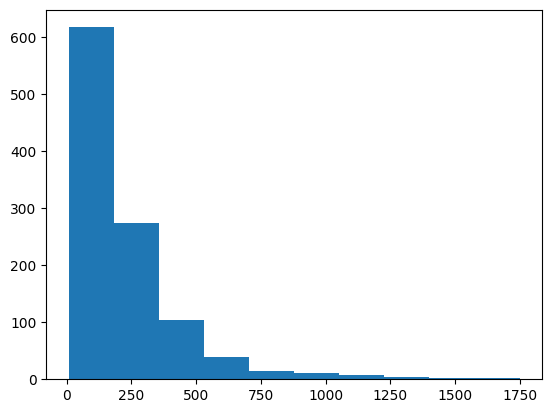

In [155]:
import matplotlib.pyplot 

plt.hist(std_preds_final)
plt.show()

In [156]:
preds_denis = pd.read_csv(
    '../../data/final/UH2023_Universidad Complutense de Madrid (UCM)_Malbecs_1.txt', 
    sep="|", 
    header=None
)

preds_final = data_final[
    ['id_finca', 'variedad','modo','tipo','color','superficie']
].copy()

preds_final['produccion'] = y_pred_final

preds_final = preds_final.sort_values(
    ['id_finca', 'variedad','modo','tipo','color','superficie'], 
    ascending=True
)

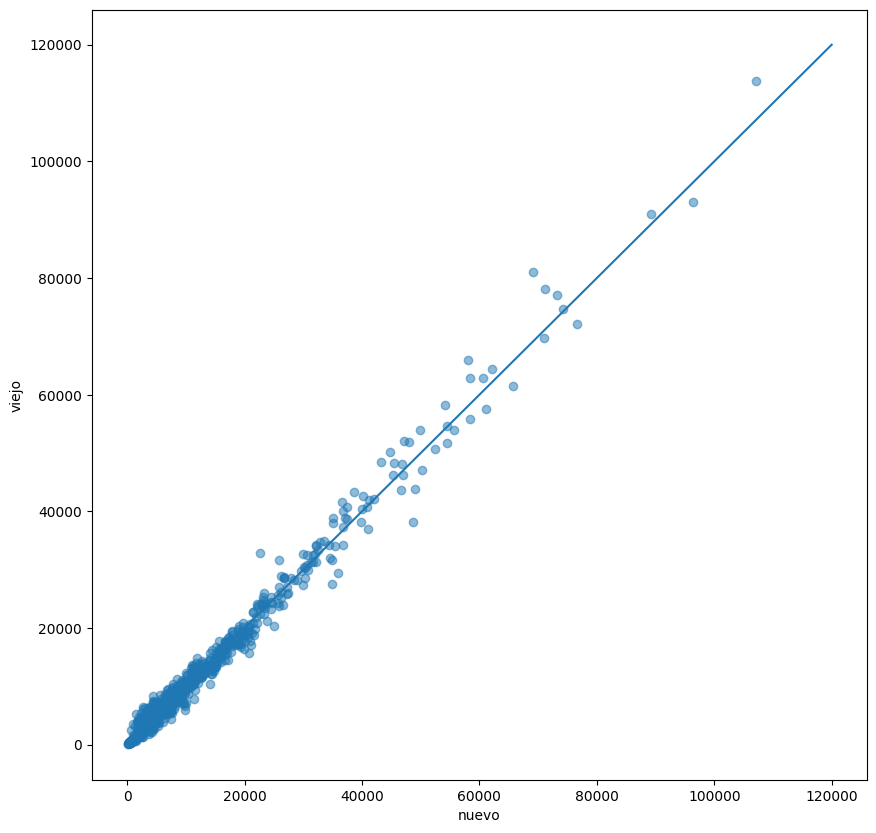

In [157]:
plt.figure(figsize=(10, 10))
plt.scatter(
    x=preds_final.iloc[:,-1],
    y=preds_denis.iloc[:, -1], 
    alpha=0.5
)
plt.plot([0, 120000], [0, 120000])
plt.xlabel('nuevo')
plt.ylabel('viejo')
plt.show()

In [82]:
# data prep
from sklearn.model_selection import train_test_split

data_train = tr.filter_camp(data.copy(), min_camp=14, max_camp=21)

data_final = tr.filter_camp(data, min_camp=22, max_camp=22)

train, test = tr.train_test_split(data_train, test_camp=21)

X, y = tr.xy_split(data_train)

cat_cols = [
    'id_finca', 
    'id_zona',
    'id_estacion', 
    'variedad',
    "modo", 
    "tipo",
    "color", 
    "prod_shift1_gt_shift2"
]

num_cols = [col for col in X.columns if col not in cat_cols]

X[cat_cols] = X[cat_cols].astype('category')

X_train, y_train = tr.xy_split(train)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)
X_test, y_test = tr.xy_split(test)
X_final, y_final = tr.xy_split(data_final)


train_idxs, test_idxs = tr.CampKFold.get_train_test(
    X['campaña'], from_camp=19, to_camp=21
)

cv = tr.CampKFold(train_idxs, test_idxs)


In [83]:
def build_final_model():

    model_num_cols = [
        "campaña",
        'superficie',
        'prod_shift_max',
        'prod_shift_avg',
        'prod_est_mean_change'
    ]

    model_cat_cols = [
        'id_finca',
        'id_zona',
        "id_estacion",
        'variedad',
        "modo",
        "tipo",
        "color",
        "prod_shift1_gt_shift2"
    ]
    m = make_pipeline(
        make_column_transformer(
            (OrdinalEncoder(handle_unknown='use_encoded_value',
                            unknown_value=-1), model_cat_cols),

            (QuantileFeatureEncoder(col="id_zona"), ['id_zona']),
            (QuantileFeatureEncoder(col="id_finca"), ['id_finca']),

            (ThresholdFeatureEncoder(col='altitud'), ['altitud']),
            (ThresholdFeatureEncoder(col='variedad'), ['variedad']),

            (KBinsDiscretizer(n_bins=5), ['altitud']),

            (MinMaxScaler(), model_num_cols),

            remainder='drop'
        ),
        RandomForestRegressor(
            random_state=99,
            n_estimators=200,
            min_samples_leaf=3,
            n_jobs=-1,
            max_features='sqrt',
        )
    )
    return m

In [84]:
res = cross_validate(
    estimator=build_final_model(),
    X=X,
    y=y,
    cv=cv,
    n_jobs=-1,
    scoring=tr.rmse_scorer,
    return_train_score=True,
    return_estimator=True
)

print("train: ",res['train_score'])
print("test: ",res['test_score'])

print("train mean: ",np.mean(res['train_score']))
print("test mean: ",np.mean(res['test_score']))

train:  [-4612.00773597 -4442.32187138 -4463.43657491]
test:  [-5237.22162835 -6912.2249843  -5456.96206056]
train mean:  -4505.922060755824
test mean:  -5868.802891071392


In [681]:
# xgboost
import xgboost as xgb

def build_model():
#     model_num_cols = [
#         'superficie',
#         'prod_shift_max',
#         'prod_shift_change',
#         'prod_shift_avg',
#         'prod_est_mean_change',
#     ]

    model_num_cols = [
        'superficie',
#         'sup_tot_camp_finca',
#         'superficie_total',
        'n_var_camp_finca',
#         'prod_shift1',
#         'prod_shift2',
#         'sup_shift1',
#         'sup_shift2',
        
        'prod_shift_max',
        'prod_shift_change',
        'prod_shift_avg',      
#         'prod_est_mean_change',
#         'prod_he_shift1',
#         'prod_he_shift2',
#         'prod_he_shift_change',
#         'prod_he_shift_avg',
#         'prod_he_var_zone_mean_hist',
#         'prod_he_var_zone_std_hist',
#         'prod_he_var_mean_hist',
#         'prod_he_var_std_hist',
#         'prod_var_shift_1',
#         'prod_var_shift_2',
#         'prod_he_zone_mean',
#         'prod_he_zone_std',
#         'prod_he_var_mean',
#         'prod_he_var_std',
#         'prod_finca_shift_1',
#         'prod_finca_shift_2'
    ]

    model_cat_cols = [
        'id_finca',
        'id_zona',
        "id_estacion",
        'variedad',
        "modo",
        "color",
        "prod_shift1_gt_shift2"
    ]
    m = make_pipeline( 
        make_column_transformer(
             
#             (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),model_cat_cols),
            
            (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['id_finca']),
#             (ce.CatBoostEncoder(),['id_finca']),
#             (ce.BaseNEncoder(),['id_finca']),
#             (ce.TargetEncoder(),['id_finca']),
#             (QuantileFeatureEncoder(col="id_finca"), ['id_finca']),

#             (ce.CatBoostEncoder(),['id_zona']),
            (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['id_zona']),
            
#             (ce.CatBoostEncoder(),['id_estacion']),
            (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['id_estacion']),
            
#             (ce.CatBoostEncoder(),['variedad']),
            (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['variedad']),
            
            
#             (ce.CatBoostEncoder(),['modo']),
             (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['modo']),
            
            (OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['color']),
#             (ce.CatBoostEncoder(),['color']),
            

#             (QuantileFeatureEncoder(col="id_zona"), ['id_zona']),
#             (ThresholdFeatureEncoder(col='altitud'), ['altitud']),
#             (ThresholdFeatureEncoder(col='variedad'), ['variedad']),
            
            (KBinsDiscretizer(n_bins=3), ['altitud']),
            
            (MinMaxScaler(), model_num_cols),
            
#             (StandardScaler(),temp_cols),
            (StandardScaler(),[c for c in percip_cols if 'Sum' in c]),
            remainder='drop'
        ),
        xgb.XGBRegressor(
            random_state=seed,
            learning_rate=0.01,
            n_estimators=400,
            max_depth=4,
            min_child_weight=5,
            gamma=1,
            reg_alpha=1,
            subsample=1,
            colsample_bytree=0.7,
            nthread=-1,
        )
    )
    return m


In [682]:
res = cross_validate(
    estimator=build_model(),
    X=X,
    y=y,
    cv=cv,
    n_jobs=-1,
    scoring=tr.rmse_scorer,
    return_train_score=True
)

print("train: ",res['train_score'])
print("test: ",res['test_score'])

train:  [-4782.23982543 -4721.0420331  -4920.67942653]
test:  [-5216.2087941  -6819.78736319 -5519.93288929]


In [696]:
[i/100.0 for i in range(0,5)]
np.logspace(start=-3, stop=-1, num=5, endpoint=True, base=10.0)


array([0.001     , 0.00316228, 0.01      , 0.03162278, 0.1       ])

In [698]:
param_grid = {
    'xgbregressor__max_depth': [4,5,6], # 
    'xgbregressor__min_child_weight': [2,4,6], # 
    'xgbregressor__learning_rate': np.logspace(start=-3, stop=-1, num=5, endpoint=True, base=10.0),
    'xgbregressor__n_estimators': [200,400,600],    
    'xgbregressor__gamma':[i/10.0 for i in range(0,5)],
    'xgbregressor__reg_alpha': [1e-5, 1e-2, 0.1, 1, 100],
    'xgbregressor__colsample_bytree': [0.8], #[i/10.0 for i in range(6,10)]
}

gsm = GridSearchCV(
    estimator=build_model(),
    param_grid=param_grid,
    cv=cv,
    verbose=1,
    scoring=tr.rmse_scorer
)

gsm.fit(X,y)

print(gsm.best_params_)
print(gsm.best_score_)

Fitting 3 folds for each of 3375 candidates, totalling 10125 fits


KeyboardInterrupt: 

In [626]:
m = build_model()
m.set_params(**gsm.best_params_)
res = cross_validate(
    estimator=m,
    X=X,
    y=y,
    cv=cv,
    n_jobs=-1,
    scoring=tr.rmse_scorer,
    return_train_score=True,
    return_estimator=True
)

print("train: ",res['train_score'])
print("test: ",res['test_score'])

train:  [-4255.4167794  -4240.69118439 -4440.90687728]
test:  [-5591.75718025 -6786.79150027 -5767.55580245]
